In [32]:
import cv2
class ShapeDetector:
    def __init__(self):
        pass
    def detect(self, c):
        shape = "unidentified"
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)
        if len(approx) == 3:
            shape = "triangle"
        elif len(approx) == 4:
            (x, y, w, h) = cv2.boundingRect(approx)
            ar = w / float(h)
            shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
        elif len(approx) == 5:
            shape = "pentagon"
        else:
            shape = "circle"
        return shape

In [31]:
import imutils
image = cv2.imread('shape_detection_thresh.jpg')
resized = imutils.resize(image, width=300)
ratio = image.shape[0] / float(resized.shape[0])

gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()

for c in cnts:
    M = cv2.moments(c)
    cX = int((M["m10"] / M["m00"]) * ratio)
    cY = int((M["m01"] / M["m00"]) * ratio)
    shape = sd.detect(c)
    
    c = c.astype("float")
    c *= ratio
    c = c.astype("int")
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,0.5, (255, 255, 255), 2)
    
    cv2.imshow("Image", image)
    cv2.waitKey(0)

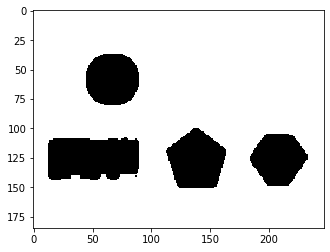

In [29]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('shape2.jpg',0)
img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

fig = plt.figure()
plt.imshow(th1,'gray')
plt.
plt.show()